In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

ImportError: No module named 'PIL'

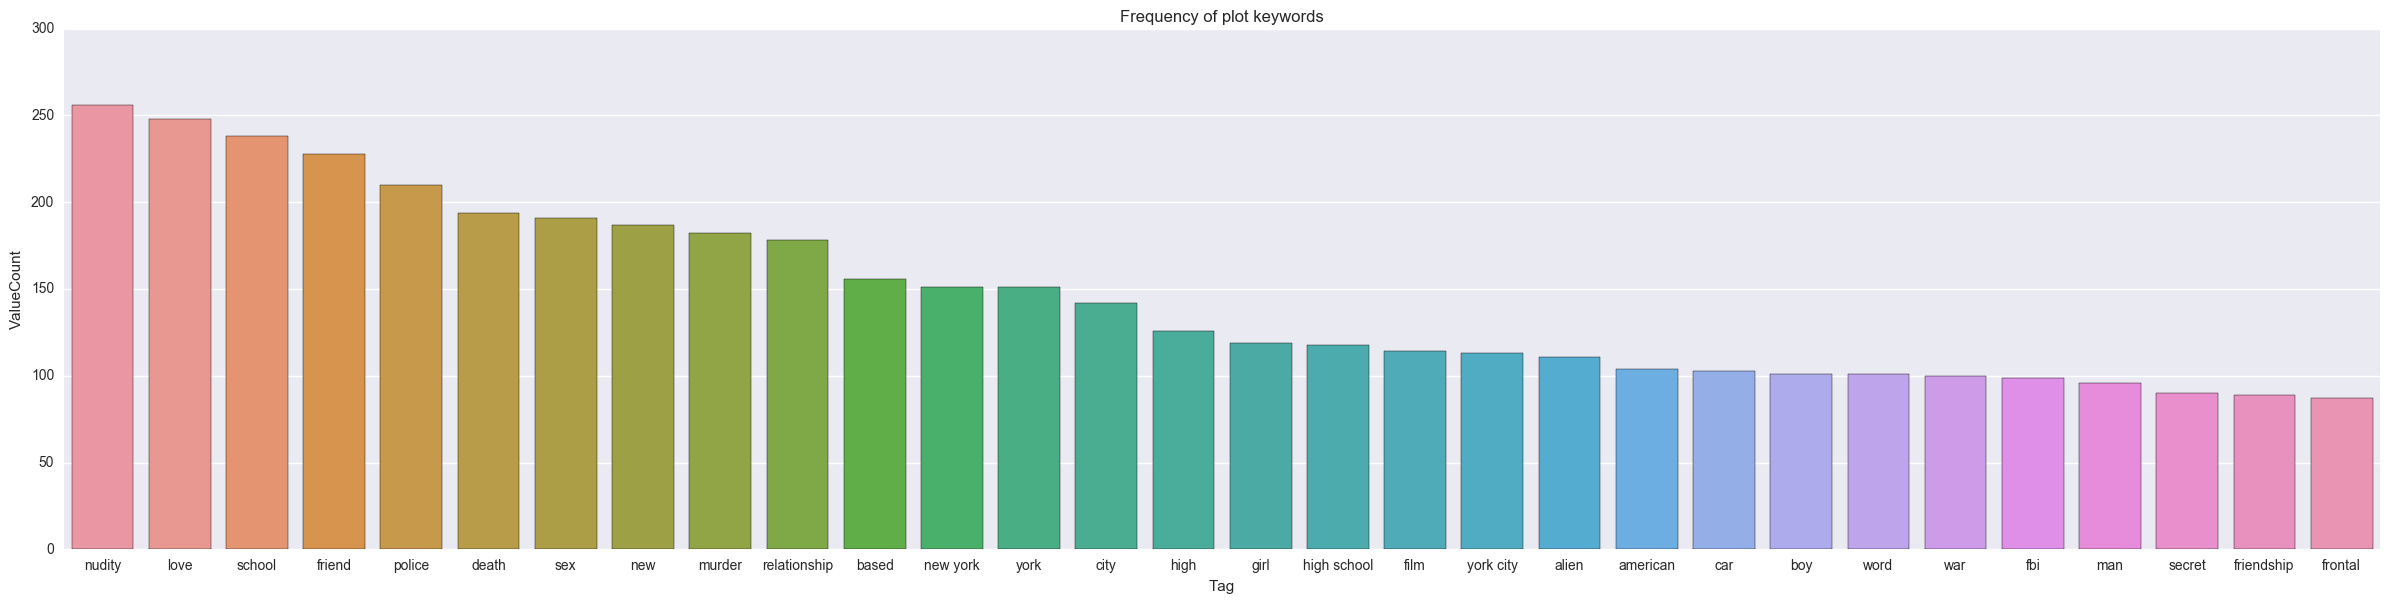

In [7]:
df = pd.read_csv('movie_metadata.csv')
df = df[df['num_voted_users'] > 100][['plot_keywords', 'gross', 'budget','duration','imdb_score', 'movie_title']]
# Split the plot_keyword string based on '|' and add an row for each string that is returned
tags = df['plot_keywords'].copy().str.split('|').apply(pd.Series, 1).stack()
tags.index = tags.index.droplevel(-1)
tags.index
tags.name = 'tags'
df = df.join(tags)
count_vect = CountVectorizer(ngram_range=(1,2), stop_words ={'and', 'in', 'of', 'the', 'on','to', 'title','reference',\
                                                             'female','male','by'})

X_train_counts = count_vect.fit_transform(df.tags.dropna())
MaxFeatureValues = X_train_counts.todense().sum(axis = 0).tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(MaxFeatureValues)), MaxFeatureValues) if pair[1] > 0]
TopTags = sorted(phrase_scores, key=lambda t: t[1] * -1)[:30]
ind = [x[0] for x in TopTags]
topValues = [x[1] for x in TopTags]
featurelist = count_vect.get_feature_names()
TopTagsNames = [featurelist[j] for j in ind]
TopTagsDf = pd.DataFrame({'Tag':TopTagsNames,'ValueCount':topValues})
ax = sns.factorplot(x="Tag", y="ValueCount", data = TopTagsDf, kind="bar", size=6, aspect=4)
plt.title('Frequency of plot keywords')

In [9]:
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
df